# 1. k-nn

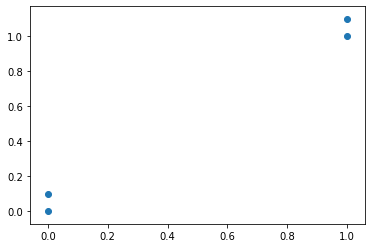

In [128]:
from numpy import *
import operator

def createDataSet():
    group= array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]]) # training set
    labels= ['A','B','C','D']
    return group, labels

group,labels = createDataSet()

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

fig=plt.figure()
ax = fig.add_subplot(111) # sbplot 그리드 인자를 정수 하나(111)에 모아서 표현, 111=1,1,1이고 , 1x1그리드 인자의 첫번째 수(subplot)를 말함
ax.scatter(group[:,0], group[:,1])
plt.show()

In [98]:
def classify0(inX,dataSet,labels,k):   # 새로운 값, 거리 계산할 데이터셋, 라벨, 거리 계산할 가까운 점 개수 
    dataSetSize= dataSet.shape[0]
    diffMat = tile(inX,(dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances ** 0.5
    sortedDistIndicies = distances.argsort()
    classCount={}
    for i in range(k):
        votelabel = labels[sortedDistIndicies[i]]
        classCount[votelabel] = classCount.get(votelabel,0) +1
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),
                              reverse=True)
    return sortedClassCount[0][0]

In [99]:
classify0([0,0],group,labels,3)

'C'

### 예제

In [100]:
def file2matrix(filename):
    love_dictionary={'largeDoses':3,'smallDoses':2,'didntLike':1}
    fr = open(filename)
    array0Lines = fr.readlines()
    numberOfLines = len(array0Lines)
    returnMat = zeros((numberOfLines,3))
    classLabelVector=[]
    index=0
    for line in array0Lines:
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        if (listFromLine[-1].isdigit()):
            classLabelVector.append(int(listFromLine[-1]))
        else:
            classLabelVector.append(love_dictionary.get(listFromLine[-1]))
        index += 1
        
    return returnMat, classLabelVector


In [101]:
datingDataMat, datingLabels= file2matrix('C:/Users/Affinity/Documents/datingTestSet.txt')

In [102]:
datingDataMat

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

In [103]:
datingLabels[0:20]

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]

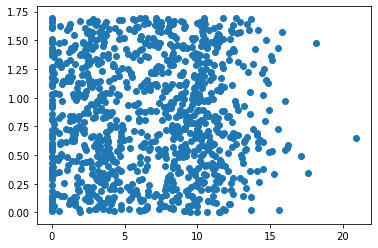

In [126]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,1], datingDataMat[:,2]) # 게임이랑 아이스크림 열 점 찍음
plt.show()

In [114]:
# 정규화 과정 (범위: 0~1)
def autoNorm(dataSet):
    minVals = dataSet.min(0)                         # 각 열의 최소값을 가진 배열
    maxVals = dataSet.max(0)                         # 각 열의 최소값을 가진 배열
    ranges = maxVals-minVals                         # 분모
    normDataSet = zeros(shape(dataSet))                # 정규화한 값을 넣을 데이터셋 만들기(영벡터)  
    m = dataSet.shape[0]                             # 배열의 길이
    normDataSet = dataSet - tile(minVals, (m,1))     # 분자
    normDataSet = normDataSet /  tile(ranges, (m,1)) # 전체 식 계산
    return normDataSet, ranges, minVals
    

In [115]:
normMat, ranges, minVals = autoNorm(datingDataMat)

In [116]:
normMat

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [117]:
ranges

array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00])

In [118]:
minVals

array([0.      , 0.      , 0.001156])

In [119]:
# 앞에서 만든 코드를 바탕으로 테스트

def datingClasstest():
    hoRatio = 0.10 # 테스트 데이터 비율 10%
    datingDataMat, datingLabels = file2matrix('C:/Users/Affinity/Documents/datingTestSet.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m= normMat.shape[0]  # 정규화된 데이터셋 길이
    numTestVecs = int(m*hoRatio) # 1000*0.1 = 100
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:], normMat[numTestVecs:m,:], datingLabels[numTestVecs:m],3)
        print("the classifier came back with: {}, the real number is: {}".format(classifierResult,datingLabels[i])) 
        if (classifierResult != datingLabels[i]): errorCount += 1.0
    print("the total rate is {}".format(errorCount/float(numTestVecs)))
    print("the error count is {}".format(errorCount))
    

In [120]:
datingClasstest()

the classifier came back with: 3, the real number is: 3
the classifier came back with: 2, the real number is: 2
the classifier came back with: 1, the real number is: 1
the classifier came back with: 1, the real number is: 1
the classifier came back with: 1, the real number is: 1
the classifier came back with: 1, the real number is: 1
the classifier came back with: 3, the real number is: 3
the classifier came back with: 3, the real number is: 3
the classifier came back with: 1, the real number is: 1
the classifier came back with: 3, the real number is: 3
the classifier came back with: 1, the real number is: 1
the classifier came back with: 1, the real number is: 1
the classifier came back with: 2, the real number is: 2
the classifier came back with: 1, the real number is: 1
the classifier came back with: 1, the real number is: 1
the classifier came back with: 1, the real number is: 1
the classifier came back with: 1, the real number is: 1
the classifier came back with: 1, the real numbe

In [121]:
def classifyPerson():
    resultList = ['전혀','약간','많이']
    percentTats = float(input("percentage of time spend playing computer games?"))
    ffMiles = float(input("frequent flier miles earned per year?"))
    iceCream = float(input("liters if ice cream consumed per year?"))
    datingDataMat, datingLabels = file2matrix('C:/Users/Affinity/Documents/datingTestSet.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = array([ffMiles,percentTats,iceCream, ])
    classifierResult = classify0((inArr-minVals)/ranges, normMat, datingLabels, 3 )
    print("You will plrobably like this person: {}".format(resultList[classifierResult-1]))

In [113]:
classifyPerson()

percentage of time spend playing computer games?10
frequent flier miles earned per year?100
liters if ice cream consumed per year?10
You will plrobably like this person: 약간


# 2. decision tree

In [341]:
from math import log
import operator

def createDataSet():
    dataSet = [[1,1,'yes'],
               [1,1,'yes'],
               [1,0,'no'],
               [0,1,'no'],
               [0,1,'no']]
    labels = ['no surfacing','flippers']
    return dataSet, labels

In [336]:
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys(): labelCounts[currentLabel] = 0
        labelCounts[currentLabel]+=1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob * log(prob,2)
    return shannonEnt

In [342]:
myDat, labels=createDataSet()

In [338]:
labels

['no surfacing', 'flippers']

In [298]:
myDat[0][2]

'yes'

In [299]:
calcShannonEnt(myDat)

0.9709505944546686

In [300]:
def splitDataSet(dataSet,axis,value):
    retDataSet=[]
    for featVec in dataSet:
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

In [351]:
splitDataSet(myDat,1,0)

[[1, 'no']]

In [302]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [354]:
def chooseBestFeatureToSplit(dataSet): 
    numFeatures = len(dataSet[0])-1                          # 라벨인 마지막 열을 빼고 두개가 속 성
    baseEntropy = calcShannonEnt(dataSet)                    #  전체 엔트로피
    bestinfoGain = 0.0; bestFeature = -1                     # 
    
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList)                           # 표면x 속성 값의 리스트를 집합으로 즉, 중복값어 없어진 1,0이 됨
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet,i,value)
            print(subDataSet)
            prob = len(subDataSet)/float(len(dataSet))        # prob는 전체 원소 중 해당 노드의 원소 개수
            print(prob)
            newEntropy  += prob * calcShannonEnt(subDataSet)  # i=0일 때 prob * 그때의 엔트로피 + i=1일 때 prob * 그때의 엔트로피
            print(newEntropy)
            infoGain = baseEntropy - newEntropy               # 사전 엔트로피 - 분할 후 엔트로피
            print("=",infoGain)
            if (infoGain > bestinfoGain):
                bestinfoGain = infoGain
                bestFeature = i                               # best였을 때 i값이 최적의 분할속성
        return bestFeature

In [355]:
chooseBestFeatureToSplit(myDat)

[[1, 'no'], [1, 'no']]
0.4
0.0
= 0.9709505944546686
[[1, 'yes'], [1, 'yes'], [0, 'no']]
0.6
0.5509775004326937
= 0.4199730940219749


0

In [305]:
def majorityCnt(classList):
    classCount={}
    for vote in classList:
        if vote not in classCount.keys(): 
            classCount[vote]=0 
        classCount[vote]+=1
    sortedCalssCount = sorted(classCount.items(),key=operator.itemgetter(1),
                              reverse=True)           # 큰 값을 가진 속성이 앞에
    return sortedCalssCount[0][0] 

In [306]:
def createTree(dataSet,labels):
    classList = [example[-1] for example in dataSet] # 데이터셋에서 각 행의 마지막 열(-1) 값 구함. 클래스라벨 값들이 1차원 리스트로 나옴
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    if len(dataSet[0])==1:
        return majorityCnt(classList)
    
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]
        myTree[bestFeatLabel][value]=createTree(splitDataSet(dataSet,bestFeat,value),subLabels)

    return myTree


In [340]:
def createTree2(dataSet, labels):
    classList = [example[-1] for example in dataSet] # 행 단위임 / y를 추출하여 classList를 
    # for문을 통해 간단히 array의 요소 추출하기
    # 첫 번째 if는 변수(열) 값이 모두 같아서 분류 기준을 정할 수 없으면 멈춤
    if classList.count(classList[0]) == len(classList): # stop splitting when all of the classes are equal
        return classList[0]                             # 첫 번째 멈춤 조건, 모든 분류 항목이 같을 때 멈춤
    # 두 번째 if는 열이 1개만남았을 떄 가장 많은 class의 갯수를 반환
    if len(dataSet[0]) == 1:                            # stop splitting when there are no more features in dataSet
        return majorityCnt(classList)                   # 두 번째 멈춤 조건, 더 이상 분류할 속성이 없을 때 가장 많은 수를 반환
    # Info Gain이 최대로 되는
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    # 이 밑부터 재귀
    myTree = {bestFeatLabel : {}} # 유일한 값의 리스트를 구함
    
    subLabels = labels[:]
    del (labels[bestFeat])
    
    featValues = [example[bestFeat] for example in dataSet] # Info Gain이 가장 높은 열
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]# copy all of labels, so trees don't mess up existing labels
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)
    return myTree

In [308]:
def retrieveTree(i):
    listofTrees = [{0: 'no surfacing',1:{'flippers:':{0:'no',1:'yes'}}}]
    return listofTrees[i]

In [333]:
def classify(inputTree, featLabels,testVec):
    firstStr = list(inputTree)[0]
    print("firstStr:{}".format(list(inputTree)[0])) #'no surfacing'
    secondDict = inputTree[firstStr] # {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}
    featIndex = featLabels.index(firstStr) # 0
    key = testVec[featIndex] # 1
    valueOfFeat = secondDict[key] # {'flippers': {0: 'no', 1: 'yes'}}
    
    if isinstance(valueOfFeat, dict):
        classLabel = classify(valueOfFeat, featLabels, testVec)
    else:
        classLabel = valueOfFeat
    return classLabel
    


In [343]:
k= createTree2(myDat,labels)
k

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [345]:
k['no surfacing']

{0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}

In [347]:
labels.index('no surfacing')
labels

ValueError: 'no surfacing' is not in list

In [349]:
labels= ['no surfacing','flippers']

In [111]:
myTree = retrieveTree(0)
myTree

{0: 'no surfacing', 1: {'flippers:': {0: 'no', 1: 'yes'}}}

In [350]:
classify(k, labels,[1,1])

firstStr:no surfacing
firstStr:flippers


'yes'

# 회귀분석

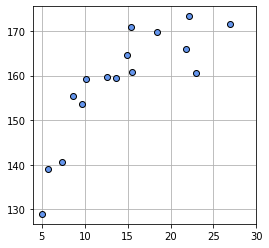

In [238]:
np.random.seed(1)
X_min = 4
X_max = 30
X_n = 16
X = 5 +25 *np.random.rand(X_n)
Prm_c = [170,108,0.2]
T=Prm_c[0]- Prm_c[1] * np.exp(-Prm_c[2]*x) + 4 * np.random.randn(X_n)


plt.figure(figsize = (4,4))
plt.plot(X,T,marker='o',linestyle = 'None',markeredgecolor = 'black',color = 'cornflowerblue')
plt.xlim(X_min,X_max)
plt.grid(True)
plt.show()

In [241]:
from mpl_toolkits.mplot3d import Axes3D

#평균오차함수
def mse_line(x,t,w):
    y= w[0] * x + w[1]
    mse = np.mean((y-t)**2)
    return mse

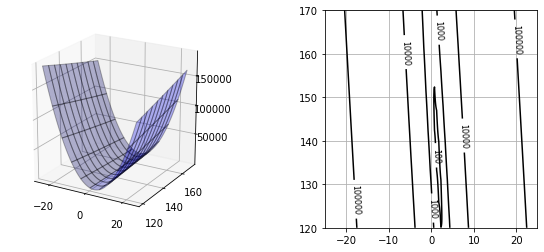

In [250]:
#계산
xn =100
w0_range = [-25,25]
w1_range = [120,170]
x0 = np.linspace(w0_range[0],w0_range[1],xn)
x1 = np.linspace(w1_range[0],w1_range[1],xn)
xx0,xx1 = np.meshgrid(x0,x1)
J = np.zeros((len(x0),len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1,i0] = mse_line(X,T, (x0[i0],x1[i1]))
# 표시
plt.figure(figsize= (9.5,4))
plt.subplots_adjust(wspace=0.5)

ax = plt.subplot(1,2,1,projection = '3d')
ax.plot_surface(xx0,xx1,J,rstride=10,cstride=10,alpha = 0.3, color = 'blue', edgecolor = 'black')
ax.set_xticks([-20,0,20])
ax.set_yticks([120,140,160])
ax.view_init(20,-60)

plt.subplot(1,2,2)
cont = plt.contour(xx0,xx1,J,30,colors = 'black', levels = [100,1000,10000,100000])
cont.clabel(fmt='%1.0f',fontsize = 8)
plt.grid(True)
plt.show()

In [283]:
def dmse_line(x,t,w):
    y = w[0] * x + w[1]
    d_w0= 2 * np.mean((y-t)*x)
    d_w1= 2 * np.mean(y-t)
    return d_w0,d_w1

d_w = dmse_line(X,T,[10,165])
print(np.round(d_w,1))
    

<class 'numpy.float64'>
[5046.3  301.8]


<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.fl

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.fl

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.fl

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.fl

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.fl

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.fl

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.fl

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.fl

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.fl

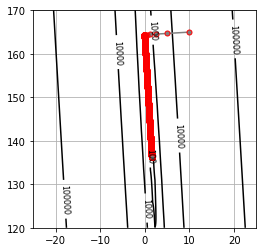

In [288]:
def fit_line_num(x,t):
    w_init = [10.0,165.0]
    alpha = 0.001
    i_max = 100000
    eps = 0.1
    w_i = np.zeros([i_max,2])
    w_i[0,:] = w_init
    for i in range(1,i_max):
        dmse = dmse_line(x,t,w_i[i-1])
        w_i[i,0] = w_i[i-1,0] - alpha * dmse[0]
        w_i[i,1] = w_i[i-1,1] - alpha * dmse[1]
        if max(np.absolute(dmse)) < eps: 
            break
    w0 = w_i[i,0]
    w1 = w_i[i,1]
    w_i = w_i[:i,:]
    return w0,w1,dmse,w_i

#메인
plt.figure(figsize = (4,4))
xn = 100
w0_range = [-25,25]
w1_range = [120,170]
x0= np.linspace(w0_range[0],w0_range[1],xn)
x1 = np.linspace(w1_range[0],w1_range[1],xn)
xx0,xx1 = np.meshgrid(x0,x1)
J = np.zeros((len(x0),len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1,i0] = mse_line(X,T, (x0[i0],x1[i1]))
cont = plt.contour(xx0,xx1,J,30,colors = 'black', levels = [100,1000,10000,100000])
cont.clabel(fmt='%1.0f',fontsize = 8)
plt.grid(True)

# 경사하강법 호출
W0,W1,dMSE,W_history = fit_line_num(X,T)

#결과보기
print("반복횟수 {0}".format(W_history.shape[0]))
print("W = [{0:.6f},{1:.6f}]".format(W0,W1))
print("dMSE = [{0:.6f},{1:.6f}]".format(dMSE[0],dMSE[1]))
print("MSE = {0:.6f}".format(mse_line(X,T,[W0,W1])))
plt.plot(W_history[:,0], W_history[:,1],'.-', color='gray',markersize=10,markeredgecolor='red')
plt.show()

    
    
        

In [ ]:
def show_line(w):
    xb = np.linspace